In [519]:
# import requests

# r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")

In [520]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file(f="E:\CS_code\机器学习\lab1\\a9a.txt", n_features=123)
X = X.toarray()

In [521]:
import numpy

n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [522]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)

In [523]:
train_samples,train_features=X_train.shape
batch_size=100
max_epoch = 5000
learning_rate = 0.0005
C = 0.25

losses_train = []
losses_val = []

In [524]:
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [525]:
# #MBGD for linear classification（SVM）
for epoch in range(max_epoch):
    Batch_X_train = numpy.zeros((batch_size,train_features))
    h = numpy.zeros((batch_size,1))
    y_hat = numpy.zeros((batch_size,1))
    rand_sample = numpy.random.randint(0,train_samples,batch_size)
    for i in range(batch_size):
        Batch_X_train[i] = X_train[rand_sample[i]]
        h[i] = 1 - y_train[rand_sample[i]] * numpy.dot(X_train[rand_sample[i]], w)
        y_hat[i] = numpy.where(h[i] > 0, y_train[rand_sample[i]], 0)
    w -= learning_rate * (w - C  * numpy.dot(Batch_X_train.transpose(), y_hat))
    # y_predict_train = numpy.where(numpy.dot(X_train, w) > 0, 1, -1)
    loss_train = 0.5 * numpy.sum(w * w) + C / y_train.size * numpy.sum(numpy.maximum(1 - y_train * numpy.dot(X_train, w), 0))
    losses_train.append(loss_train)

    # y_predict_val = numpy.where(numpy.dot(X_val, w) > 0, 1, -1)
    loss_val = 0.5 * numpy.sum(w * w) + C / y_val.size * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
    losses_val.append(loss_val)

In [526]:
#MBGD for Logistic Regression
# for epoch in range(max_epoch):
#     Batch_X_train = numpy.zeros((batch_size,train_features))
#     h = numpy.zeros((batch_size,1))
#     y_hat = numpy.zeros((batch_size,1))
#     for i in range(batch_size):
#         rand_sample = numpy.random.randint(0,train_samples,1)
#         Batch_X_train[i] = X_train[rand_sample]
#         h[i] = numpy.reciprocal(1+numpy.exp(-numpy.dot(w.T,Batch_X_train[i])))
#         y_hat[i] = numpy.where(h[i] > 0.5, 1-h[i], h[i])
#     w -= learning_rate * (w - 1 / batch_size * numpy.dot(Batch_X_train.transpose(), y_hat))
#     # w = (w - C * numpy.dot(Batch_X_train.transpose(), y_hat))
#     y_predict_train = numpy.where(numpy.dot(X_train, w) > 0, 1, -1)
#     loss_train = 0.5 * numpy.sum(w * w) + C / y_train.size * 
#     # numpy.sum(numpy.maximum(1 - y_train * numpy.dot(X_train, w), 0))
#     losses_train.append(loss_train)

#     y_predict_val = numpy.where(numpy.dot(X_val, w) > 0, 1, -1)
#     loss_val = 0.5 * numpy.sum(w * w) + C / y_val.size * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
#     losses_val.append(loss_val)

In [527]:
from sklearn.metrics import classification_report

print(classification_report(y_val, numpy.where(numpy.dot(X_val, w) > -0.96, 1, -1), target_names=["positive", "negative"], digits=4))

              precision    recall  f1-score   support

    positive     0.9492    0.7256    0.8225     12374
    negative     0.5023    0.8771    0.6388      3907

    accuracy                         0.7619     16281
   macro avg     0.7258    0.8013    0.7306     16281
weighted avg     0.8420    0.7619    0.7784     16281



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

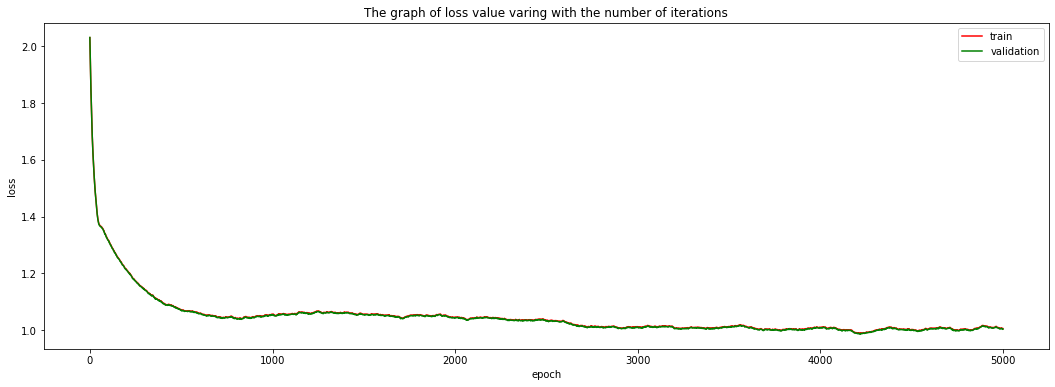

In [528]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="g", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")